# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Libraries for Classification and building Models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
# Project Specific Libraries

import os
import librosa
import librosa.display
import glob 
import skimage

# Analysing Data type format

In [4]:
df = pd.read_csv("UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


## Using Librosa to analyse random sound sample - SPECTOGRAM


Text(0.5, 1.0, 'Linear-frequency power spectrogram')

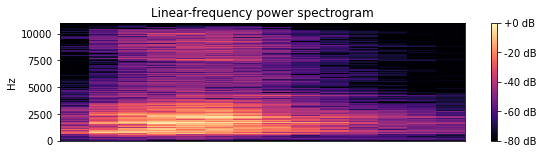

In [5]:
dat1, sampling_rate1 = librosa.load('fold5/100032-3-0-0.wav')
dat2, sampling_rate2 = librosa.load('fold5/100263-2-0-117.wav')

plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

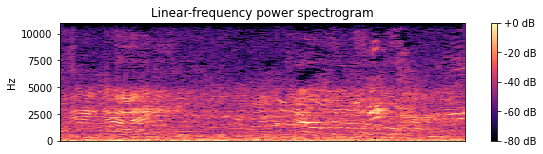

In [6]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

# Feature extraction and Database Building

In [7]:
dat1, sampling_rate1 = librosa.load('fold5/100032-3-0-0.wav')
arr = librosa.feature.melspectrogram(y=dat1, sr=sampling_rate1)
arr

array([[5.2041847e-05, 7.4304415e-05, 7.9062178e-05, ..., 7.2118869e-06,
        9.1289648e-06, 2.2435783e-05],
       [1.1983800e-04, 1.0407303e-04, 1.2973434e-04, ..., 1.5024093e-05,
        3.2160071e-05, 5.9852322e-05],
       [2.1444363e-04, 1.9571814e-04, 1.6796264e-04, ..., 1.9602911e-04,
        2.1960895e-04, 3.1910744e-04],
       ...,
       [2.2120930e-05, 7.1933417e-04, 9.0416092e-03, ..., 7.6777469e-06,
        2.8534155e-06, 1.6350416e-06],
       [1.2387790e-05, 3.7830550e-04, 2.3212265e-03, ..., 1.9659210e-06,
        8.1735595e-07, 3.0941581e-07],
       [2.0148848e-06, 2.1154365e-05, 1.2156230e-04, ..., 1.5913621e-07,
        6.1772454e-08, 4.1444746e-08]], dtype=float32)

In [8]:
arr.shape

(128, 14)

In [9]:
(128, 14)
feature = []
label = []

def parser(row):
    # Function to load files and extract features
    for i in range(8732):
        file_name = 'fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        # We extract mfcc feature from data
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)        
        feature.append(mels)
        label.append(df["classID"][i])
    return [feature, label]

In [10]:
temp = parser(df)

/home/faerie-mattins/Desktop/sound_recog/venv/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
/home/faerie-mattins/Desktop/sound_recog/venv/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
/home/faerie-mattins/Desktop/sound_recog/venv/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(


In [11]:
temp = np.array(temp)
data = temp.transpose()

<ipython-input-11-16088c198d1d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp = np.array(temp)


In [12]:
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)
X = np.empty([8732, 128])

(8732,) (8732,)


In [13]:
for i in range(8732):
    X[i] = (X_[i])

In [14]:
Y = to_categorical(Y)

In [15]:
print(X.shape)
print(Y.shape)

(8732, 128)
(8732, 10)


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [17]:
X_train = X_train.reshape(6549, 16, 8, 1)
X_test = X_test.reshape(2183, 16, 8, 1)

In [18]:
input_dim = (16, 8, 1)

# Creating Keras Model and Testing

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation = "tanh"))
model.add(Dense(10, activation = "softmax"))

In [21]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [22]:
model.fit(X_train, Y_train, epochs = 90, batch_size = 50, validation_data = (X_test, Y_test))


Epoch 1/90
131/131 [==============================] - 4s 30ms/step - loss: 1.7604 - accuracy: 0.4021 - val_loss: 1.2738 - val_accuracy: 0.5772
Epoch 2/90
131/131 [==============================] - 4s 29ms/step - loss: 1.2026 - accuracy: 0.5958 - val_loss: 1.1334 - val_accuracy: 0.6148
Epoch 3/90
131/131 [==============================] - 4s 28ms/step - loss: 0.9819 - accuracy: 0.6683 - val_loss: 1.0029 - val_accuracy: 0.6716
Epoch 4/90
131/131 [==============================] - 4s 28ms/step - loss: 0.8762 - accuracy: 0.7008 - val_loss: 0.9667 - val_accuracy: 0.6899
Epoch 5/90
131/131 [==============================] - 4s 27ms/step - loss: 0.7615 - accuracy: 0.7481 - val_loss: 0.9187 - val_accuracy: 0.7288
Epoch 6/90
131/131 [==============================] - 4s 28ms/step - loss: 0.6718 - accuracy: 0.7653 - val_loss: 0.8725 - val_accuracy: 0.7343
Epoch 7/90
131/131 [==============================] - 6s 45ms/step - loss: 0.6205 - accuracy: 0.7912 - val_loss: 0.9214 - val_accuracy: 0.7357

Epoch 58/90
131/131 [==============================] - 4s 32ms/step - loss: 0.0799 - accuracy: 0.9746 - val_loss: 0.9150 - val_accuracy: 0.8429
Epoch 59/90
131/131 [==============================] - 4s 29ms/step - loss: 0.0929 - accuracy: 0.9697 - val_loss: 0.8436 - val_accuracy: 0.8479
Epoch 60/90
131/131 [==============================] - 4s 28ms/step - loss: 0.0877 - accuracy: 0.9705 - val_loss: 0.8636 - val_accuracy: 0.8539
Epoch 61/90
131/131 [==============================] - 4s 29ms/step - loss: 0.0913 - accuracy: 0.9686 - val_loss: 0.9086 - val_accuracy: 0.8406
Epoch 62/90
131/131 [==============================] - 4s 31ms/step - loss: 0.0740 - accuracy: 0.9768 - val_loss: 0.8362 - val_accuracy: 0.8530
Epoch 63/90
131/131 [==============================] - 4s 32ms/step - loss: 0.0738 - accuracy: 0.9752 - val_loss: 0.8816 - val_accuracy: 0.8470
Epoch 64/90
131/131 [==============================] - 4s 30ms/step - loss: 0.0795 - accuracy: 0.9733 - val_loss: 0.8337 - val_accuracy:

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 8, 64)         640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 4, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 2, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1

In [25]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(score)

69/69 [==============================] - 0s 5ms/step - loss: 0.8846 - accuracy: 0.8562
[0.8846327066421509, 0.8561612367630005]


In [26]:
# serialize model to JSON
model_json = model.to_json()
with open("savedModel/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("savedModel/model.h5")
print("Saved model to disk")

Saved model to disk


In [27]:
print(predictions) 

[[1.4466537e-09 1.9374886e-12 9.9989581e-01 ... 2.4155017e-23
  1.3412732e-16 1.8132441e-07]
 [2.8542450e-02 2.1996722e-03 1.0617786e-01 ... 7.2300155e-04
  8.3924341e-01 8.9494409e-03]
 [2.7269930e-17 3.3179785e-12 6.9711836e-09 ... 2.1039855e-19
  1.0000000e+00 1.1075428e-12]
 ...
 [1.2099254e-12 3.1906129e-08 9.9999976e-01 ... 1.6135993e-12
  4.9492574e-18 1.8208654e-07]
 [7.0920847e-10 1.9761838e-15 1.2356192e-12 ... 6.5154550e-13
  4.7927999e-17 4.0841053e-11]
 [2.8830927e-09 1.1261539e-08 2.4103883e-10 ... 1.5552309e-14
  4.1458654e-05 4.4329004e-10]]


In [41]:
def predict(file_name):
    #file_name = "7061-6-0-0.wav"
    # Here kaiser_fast is a technique used for faster extraction
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    # We extract mfcc feature from data
    mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)  
    mels=mels.reshape(1,16,8,1)
    a=model.predict(mels)
    classid=(np.argmax(a))
    new_df=df.loc[(df.classID==classid)]
    label_predict=np.array(new_df["class"])
    className=label_predict[0]
    return className    